# МОДЕЛИРОВАНИЕ ДИСКРЕТНЫХ РАСПРЕДЕЛЕНИЙ

## 1. Алгоритмы Д1-Д8

In [1]:

from ast import Yield
from math import trunc, trunc


def uniform():
    a = 0.12
    yield a
    while True:
        k = (len(str(a)) - 2) // 2
        a = a**2 * 10**(3*k) // 1 * 10 ** (-2*k) - a**2 * 10**k // 1
        a_next = yield a
        if a_next: a,a_next = a_next,None

def D1(*values, size = 1, alfa = uniform()):
    """probability mass function"""
    x,p = values
    #1 моделируем значение Q = alfa (in Uniform 0,1)
    for iter in range(size):
        Q = next(alfa)
        #2
        m=0
        #3
        Q-=p[m]
        #4
        while Q>0:
            m+=1
            Q-=p[m]
        yield x[m]

def D2(*values, size = 1, alfa = uniform()):
    """probability mass function"""
    *x,p = values


    #1 моделируем значение Q = alfa (in Uniform 0,1)
    for iter in range(size):
        Q = next(alfa)
        #2
        m=0
        #3
        Q-=p[m]
        #4
        while Q>0:
            m+=1
            Q-=p[m]
        yield m
    
def D3(*values, size = 1, alfa = uniform()):
    """probability mass function for 2"""
    if len(values)<2: return
    x,p = values
    if len(x)>2 or len(p) > 2: return 
    for iter in range(size):
        #1 моделируем значение Q = alfa (in Uniform 0,1)
        Q = next(alfa)
    
        yield x[Q>=p[0]]
  
def D4( *values,
        size = 1, 
        alfa = uniform()   
    ):
    fi,psi,r = values
    """probability mass function for integer var"""
    for iter in range(size):
        #1 моделируем значение Q = alfa (in Uniform 0,1)
        Q = next(alfa)
        m=0
        p = psi(m)
        Q-=p
        while Q>0.00001:
            m+=1
            p=psi(m)
            Q-=p
        yield fi(m)
    

def D5(*values, size = 1, alfa = uniform()):
    """discrete uniform distribution"""
    if len(values)<2: return
    x,p = values


    for iter in range(size):
        #1 моделируем значение Q = alfa (in Uniform 0,1)
        Q = next(alfa)
        m = len(x)
        yield x[trunc(Q*m)]

def D6(*values, size = 1, alfa = uniform()):
    """discrete uniform distribution"""
    if len(values)<2: return
    x,p = values


    m = len(x)

    s = [0]
    for pk in p:
        s.append(s[-1]+pk)
    s.remove(0)


    r = []
    i=0
    for j in range(m):
        while(m*s[j])<=j-1: i+=1
        r.append(i)

    for iter in range(size):
        #1 моделируем значение Q = alfa (in Uniform 0,1)
        Q = next(alfa)
        j = trunc(m*Q)
        i = r[j]

        while Q>s[i]:i+=1


        yield x[i]

def D7(*values, size = 1, alfa = uniform()):
    """discrete distribution binary search"""
    if len(values)<2: return
    x,p = values


    m = len(x)

    s = [0]
    for pk in p:
        s.append(s[-1]+pk)
    s.remove(0)

    for iter in range(size):
        # 1 моделируем значение Q = alfa (in Uniform 0,1)
        Q = next(alfa)
        i = 0
        j = m-1

        while(i<j):
            k = (i+j)//2
            if Q<s[k]: j = k 
            else : i = k+1
        yield x[i]


def D8(*values, size = 1, alfa = uniform()):
    """WALKER's method"""
    if len(values)<3: return
    a,b,pi = values

    for iter in range(size):
        # 1 моделируем значение Q = alfa (in Uniform 0,1)
        Q = next(alfa)
        
        n = len(a)
        m = trunc(Q*n)-1


        Q = next(alfa)
        yield a[m]  if Q<pi[m] else b[m]

In [2]:
# next(D1([1,2,3,4],[0.25,0.25,0.25,0.25]))
# next(D2([0.25,0.25,0.25,0.25]))
# next(D3([1,2],[0.5,0.5]))
list(D4(
    lambda m: m, lambda m: (1-0.2)**m*0.2, lambda m: (1-0.2), size = 10
))
# next(D5([1,2,3,4],[0.25,0.25,0.25,0.25]))
# next(D6([1,2,3,4],[0.25,0.25,0.25,0.25]))
# next(D7([1,2,3,4],[0.25,0.25,0.25,0.25]))
# next(D8([1,1,1],[2,3,4],[1.0,0,0]))

# list(D8([1,1,1],[2,3,4],[0.5,0,0]))


[0, 0, 0, 1, 1, 0, 0, 0, 0, 12]

## Проверка на соответствие исходному распределению
### Гистограмма плотности распределения и функция распредления

In [3]:
import matplotlib.pyplot as plt

def Hist_show(*values, D, size=100):

    if len(values)<=2: 
        X,P = values
        emp_data = list(D(*values,size = size))

    elif len(values)==5: 
        X,P,a,b,pi = values
        values = values[2:]
        emp_data = list(D(*values,size = size))

    elif len(values)==3:
        fi,psi,r = values
        emp_data = list(D(*values,size = size))
        X = list(set(emp_data))
        P = list(map(psi,X))
    else : return

    
    fig, (axes,axes2)  = plt.subplots(1,2)
    counts, bins, patches  = axes.hist(x = X, bins = X + [X[-1]+1] , density=True, weights = P, label="Теоретическая плотность", color = "blue",alpha = 0.5)
    counts, bins, patches  = axes.hist(x = emp_data, bins = bins, density=True,  label="Эмпирическая плотность", color = "red",alpha = 0.5)

    axes.set_xlabel('dicsrete values')
    axes.set_ylabel('probabilities')
    axes.legend(loc = 'lower left')
   

    print("|_x_|" , *[f'{item:{"_"}^7.3f}|' for item in X] , sep = '' )
    print("|_p_|" , *[f'{item:{"_"}^7.3f}|' for item in P] , sep = '' )
    print("|_p*|" , *[f'{item:{"_"}^7.3f}|' for item in counts] , sep = '' )
    print("|_Δ_|" , *[f'{abs(xitem - yitem):{"_"}^7.3f}|' for xitem, yitem in zip(counts,P)] , sep = '' )



    dist = P[:] # d - distribution
    for i in range(1,len(dist)):
        dist[i] +=dist[i-1]
        
   

    axes2.plot(X, dist ,  label="Теоретическое распределение", color = "blue",alpha = 0.5)
    
    dist = counts[:] # d - distribution
    for i in range(1,len(dist)):
        dist[i] +=dist[i-1]

    axes2.plot(X,   dist ,  label="Эмпирическое распределение", color = "red",alpha = 0.5 )

    plt.savefig("images//"+D.__name__+"_hist.png")
    plt.show()
    return None


|_x_|_0.000_|_1.000_|_2.000_|_3.000_|
|_p_|_0.250_|_0.250_|_0.250_|_0.250_|
|_p*|_0.255_|_0.233_|_0.277_|_0.235_|
|_Δ_|_0.005_|_0.017_|_0.027_|_0.015_|


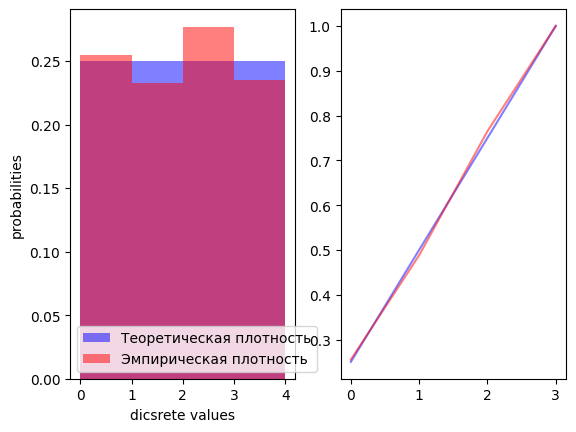

|_x_|_0.000_|_1.000_|_2.000_|_3.000_|
|_p_|_0.250_|_0.250_|_0.250_|_0.250_|
|_p*|_0.255_|_0.233_|_0.277_|_0.235_|
|_Δ_|_0.005_|_0.017_|_0.027_|_0.015_|


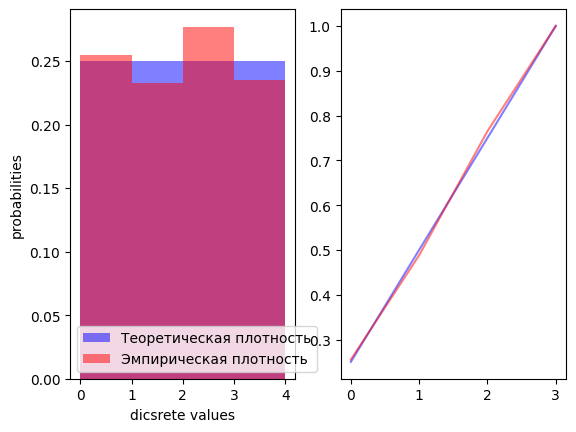

|_x_|_1.000_|_2.000_|
|_p_|_0.500_|_0.500_|
|_p*|_0.488_|_0.512_|
|_Δ_|_0.012_|_0.012_|


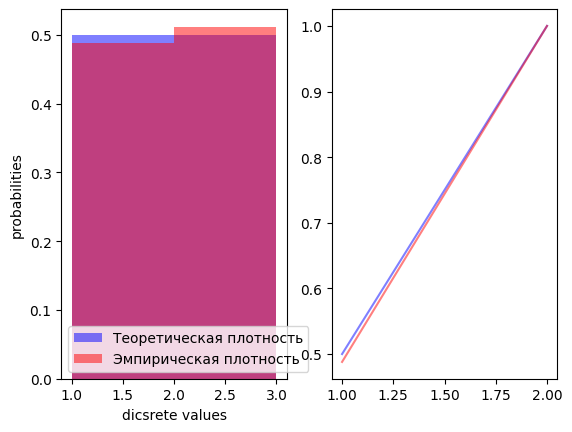

|_x_|_0.000_|_1.000_|_2.000_|_3.000_|
|_p_|_0.250_|_0.250_|_0.250_|_0.250_|
|_p*|_0.255_|_0.233_|_0.277_|_0.235_|
|_Δ_|_0.005_|_0.017_|_0.027_|_0.015_|


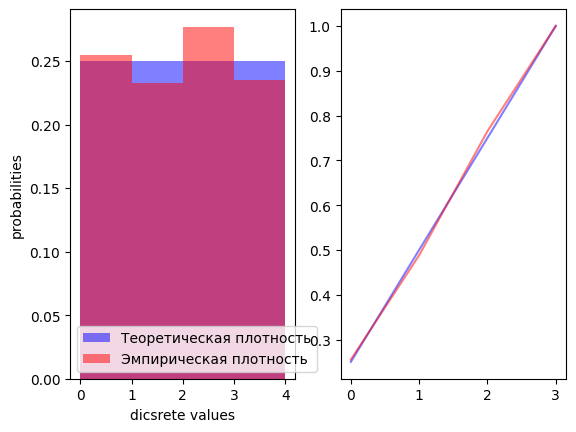

|_x_|_0.000_|_1.000_|_2.000_|_3.000_|
|_p_|_0.250_|_0.250_|_0.250_|_0.250_|
|_p*|_0.255_|_0.233_|_0.277_|_0.235_|
|_Δ_|_0.005_|_0.017_|_0.027_|_0.015_|


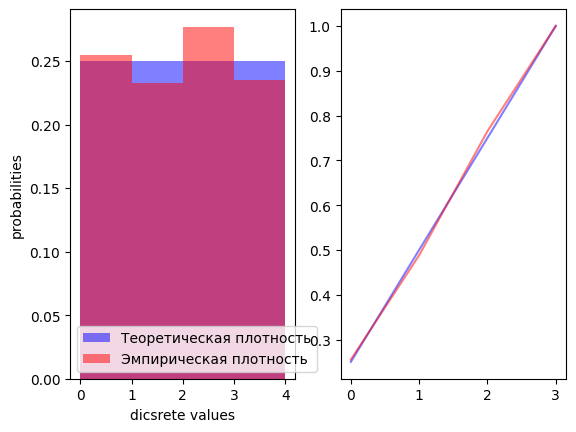

|_x_|_0.000_|_1.000_|_2.000_|_3.000_|
|_p_|_0.250_|_0.250_|_0.250_|_0.250_|
|_p*|_0.255_|_0.233_|_0.277_|_0.235_|
|_Δ_|_0.005_|_0.017_|_0.027_|_0.015_|


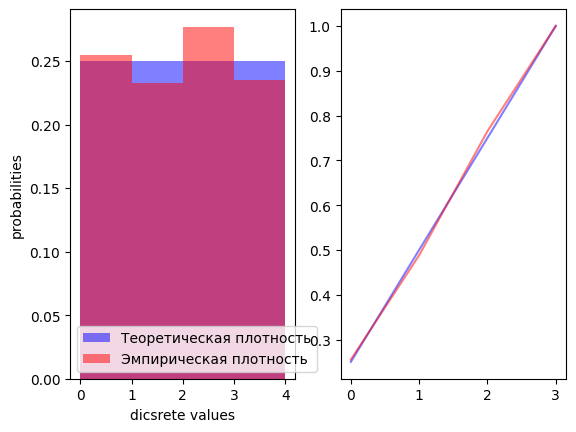

|_x_|_0.000_|_1.000_|_2.000_|_3.000_|
|_p_|_0.250_|_0.250_|_0.250_|_0.250_|
|_p*|_0.222_|_0.222_|_0.279_|_0.277_|
|_Δ_|_0.028_|_0.028_|_0.029_|_0.027_|


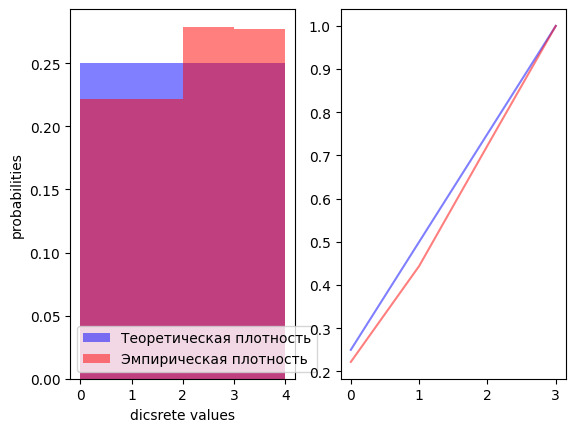

In [4]:

values =  [0,1,2,3],[0.25,0.25,0.25,0.25]
args = {
        'size' : 1000,
#        'alfa' : uniform()
}

Hist_show(*values,D = D1,size = 1000)
Hist_show(*values,D = D2,size = 1000)
Hist_show([1,2],[0.5,0.5],D = D3,size = 1000)
Hist_show(*values,D = D5,size = 1000)
Hist_show(*values,D = D6,size = 1000)
Hist_show(*values,D = D7,size = 1000)
Hist_show(*values,[0,0,0,0],[1,2,3],[0,0,0,1,1],D = D8,size = 1000)

### Проверка критерия $\chi^2_{N-1}$ 
`N = 4` по выбору случайной величины

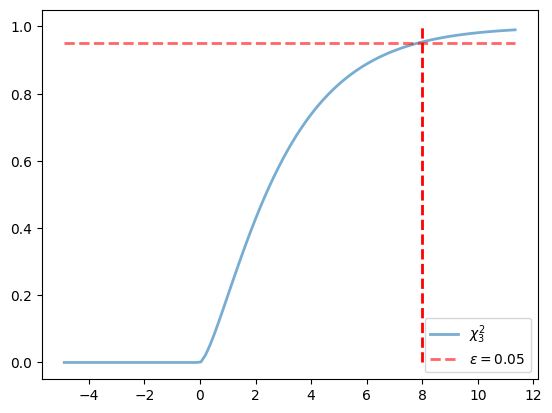

8.856000000000002 0.03126799590725725 False
8.856000000000002 0.03126799590725725 False
8.856000000000002 0.03126799590725725 False
8.856000000000002 0.03126799590725725 False
8.856000000000002 0.03126799590725725 False
2.784 0.4261405791942001 True
7.396 0.00653690740839831 False


In [5]:
import scipy.stats as sps
import numpy as np


fig, ax = plt.subplots(1, 1)

x = np.linspace(sps.chi2.ppf(0.01, 3)-5,sps.chi2.ppf(0.99, 3), 100)
ax.plot(x, sps.chi2.cdf(x, 3),  lw=2, alpha=0.6, label=r'$\chi^2_3$')
ax.plot(x, np.full(x.size, 0.95), 'r--', lw=2,  alpha=0.6, label=r'$\epsilon = 0.05$')

y = np.linspace(0,1) 
ax.plot(np.full(y.size, 8),y, 'r--', lw=2)

plt.legend()

plt.savefig("images/chi2.png")
plt.show()





d1 = list(D1(*values,size = 1000))
d2 = list(D2(*values,size = 1000))
d3 = list(D3([1,2],[0.5,0.5],size = 1000))
d5 = list(D5(*values,size = 1000))
d6 = list(D6(*values,size = 1000))
d7 = list(D7(*values,size = 1000))
d8 = list(D8([1,1,1,1],[2,3,4],[0,0,0,1,1],size = 1000))

for d in [d1,d2,d5,d6,d7,d8]:
    dc,*buf = np.histogram(d,4)
    c,p = sps.chisquare(dc, [250]*4)  
    print(c, p, p>=0.05)

dc,*buf = np.histogram(d3,2)
c,p = sps.chisquare(dc, [500]*2)  
print(c, p, p>=0.05)

## Сравнительный анализ для различных распределений




In [6]:
from functools import reduce
import scipy.stats as sps
import numpy as np
import time

In [7]:
def Mean(d):

        ev = sum(d)
        ev /= len(d)
        return ev

def Variance(d):

        ev = Mean(d)

        v = 0
        v = reduce(lambda v,x: v + (x - ev)**2, d)
        v /= len(d)
        return v


def CHI2(d, dist, n):
        dc,*buf = np.histogram(d,n)
        distc,*buf = np.histogram(dist,n)

        for i in range(n):
                distc[i]+=1
                dc[i]+=1
        c,p = sps.chisquare(dc, distc , 0) 
        return c

def Prin_M_V(*values, D, dist, e_m,e_v,n):
        
        
        print("{0:>6}|{1:>6}|{2:>6}|{3:>6}|{4:>6}|{5:>6}|{6:>6}|{7:>6}|{8:>6}|".format('N', 'E', 'E*', 'Δ', 'D', 'D*', 'Δ','chi2(p)','time'))
        for size in [10,100,1000]:
                tic = time.perf_counter()
                d = list(D(*values, size = size))
                toc = time.perf_counter()
                m = Mean(d)
        
                v = Variance(d)

                
                chi2 = CHI2(d,dist.rvs(size),n)

                print("{0:6}|{1:6.2f}|{2:6.2f}|{3:>6.2f}|{4:6.2f}|{5:6.2f}|{6:>6.2f}|{7:>6.2f}|{8:>6.3f}|".format(size, e_m, m , abs(e_m - m), e_v , v , abs(e_v - v),chi2,toc-tic))






### Биномиальное
$B(n,p)$
Функция распределения вероятности  $P(x=k) = C^n_k p^k (1-p)^{n-k}$

$\mathbb D = np(1-p)$

$\mathbb E = np$


In [8]:
n = 5

p = 0.2
from math import comb

list(map(lambda k: comb(n, k)*p**k*(1-p)**(n-k), range(5)))

[0.3276800000000001,
 0.4096000000000001,
 0.2048000000000001,
 0.05120000000000002,
 0.006400000000000002]

D1
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  1.00|  0.60|  0.40|  0.80|  0.40|  0.40|  8.50| 0.000|
   100|  1.00|  1.26|  0.26|  0.80|  0.88|  0.08| 16.17| 0.000|
  1000|  1.00|  0.96|  0.04|  0.80|  0.84|  0.04|  1.07| 0.003|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|
|_p_|_0.330_|_0.400_|_0.200_|_0.060_|_0.010_|
|_p*|_0.354_|_0.372_|_0.201_|_0.061_|_0.012_|
|_Δ_|_0.024_|_0.028_|_0.001_|_0.001_|_0.002_|


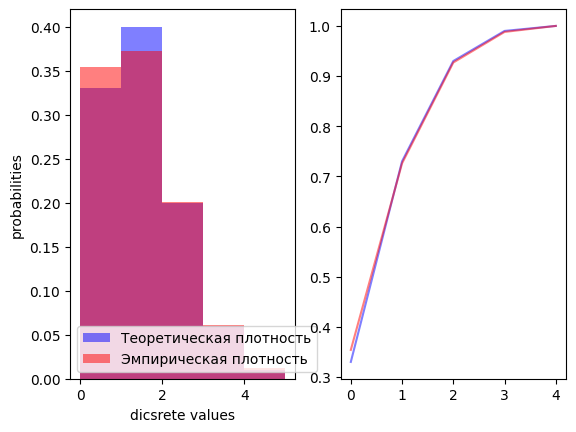

D2
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  1.00|  0.60|  0.40|  0.80|  0.40|  0.40|  9.97| 0.000|
   100|  1.00|  1.26|  0.26|  0.80|  0.88|  0.08|  9.34| 0.000|
  1000|  1.00|  0.96|  0.04|  0.80|  0.84|  0.04| 16.24| 0.003|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|
|_p_|_0.330_|_0.400_|_0.200_|_0.060_|_0.010_|
|_p*|_0.354_|_0.372_|_0.201_|_0.061_|_0.012_|
|_Δ_|_0.024_|_0.028_|_0.001_|_0.001_|_0.002_|


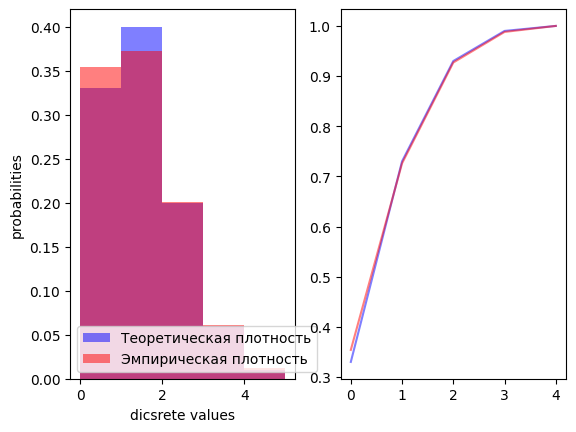

D6
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  1.00|  0.60|  0.40|  0.80|  0.40|  0.40|  9.78| 0.000|
   100|  1.00|  1.26|  0.26|  0.80|  0.88|  0.08|  3.93| 0.000|
  1000|  1.00|  0.96|  0.04|  0.80|  0.84|  0.04| 11.88| 0.005|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|
|_p_|_0.330_|_0.400_|_0.200_|_0.060_|_0.010_|
|_p*|_0.354_|_0.372_|_0.201_|_0.061_|_0.012_|
|_Δ_|_0.024_|_0.028_|_0.001_|_0.001_|_0.002_|


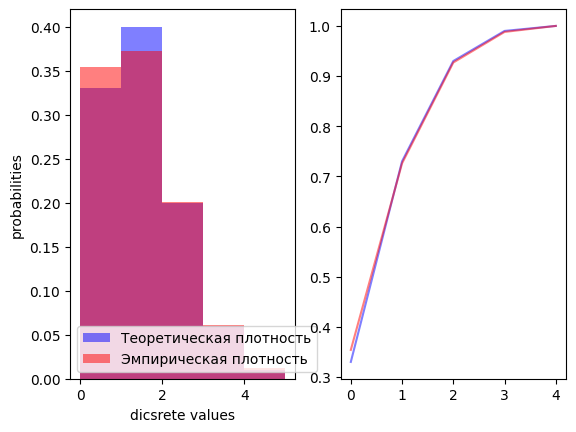

D7
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  1.00|  0.60|  0.40|  0.80|  0.40|  0.40|  5.53| 0.000|
   100|  1.00|  1.26|  0.26|  0.80|  0.88|  0.08|  8.29| 0.000|
  1000|  1.00|  0.96|  0.04|  0.80|  0.84|  0.04|  7.07| 0.003|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|
|_p_|_0.330_|_0.400_|_0.200_|_0.060_|_0.010_|
|_p*|_0.354_|_0.372_|_0.201_|_0.061_|_0.012_|
|_Δ_|_0.024_|_0.028_|_0.001_|_0.001_|_0.002_|


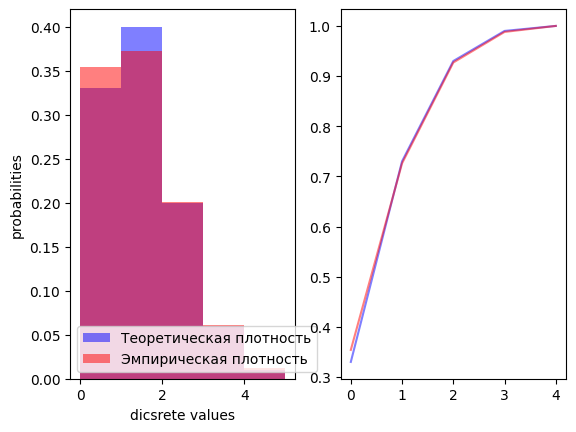

In [9]:

n = 5
p = 0.2

binom = sps.binom(n=n,p=p)


values = [0, 1, 2, 3, 4],[0.33,
 0.4,
 0.2,
 0.06,
 0.01]

args = {
    'dist' : binom,
    'e_m' : n*p, 
    'e_v' : n*p*(1-p),
    'n' : n - 1
}



for D in [D1,D2,D6,D7]:
    print(D.__name__)
    Prin_M_V(*values, D = D, **args)
    Hist_show(*values,D = D, size = 1000)

# values = lambda k: k, lambda k: comb(n, k)*p**k*(1-p)**(n-k), lambda k: (n-k)/(k+1)*p/(1-p)
# print(D4.__name__)
# Prin_M_V(*values, D = D4, **args)



In [10]:
p = 0.2
n = 15

list(map(lambda k:  (1-p)**k*p, range(n)))
list(range(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

D4
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  4.00|  5.60|  1.60| 20.00| 34.66| 14.66|  6.17| 0.000|
   100|  4.00|  4.63|  0.63| 20.00| 26.09|  6.09| 21.41| 0.001|
  1000|  4.00|  4.08|  0.08| 20.00| 21.69|  1.69| 35.67| 0.004|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|_5.000_|_6.000_|_7.000_|_8.000_|_9.000_|10.000_|11.000_|12.000_|13.000_|14.000_|15.000_|16.000_|17.000_|18.000_|19.000_|20.000_|21.000_|22.000_|24.000_|25.000_|26.000_|
|_p_|_0.200_|_0.160_|_0.128_|_0.102_|_0.082_|_0.066_|_0.052_|_0.042_|_0.034_|_0.027_|_0.021_|_0.017_|_0.014_|_0.011_|_0.009_|_0.007_|_0.006_|_0.005_|_0.004_|_0.003_|_0.002_|_0.002_|_0.001_|_0.001_|_0.001_|_0.001_|
|_p*|_0.174_|_0.148_|_0.128_|_0.092_|_0.104_|_0.052_|_0.072_|_0.038_|_0.054_|_0.040_|_0.022_|_0.010_|_0.014_|_0.010_|_0.004_|_0.010_|_0.002_|_0.002_|_0.002_|_0.004_|_0.004_|_0.002_|_0.001_|_0.006_|_0.002_|_0.002_|
|_Δ_|_0.026_|_0.012_|_0.000_|_0.010_|_0.022_|_0.014_|_0.020_|_0.004_|_0.020_|_0.013_|_0.001_|_0.00

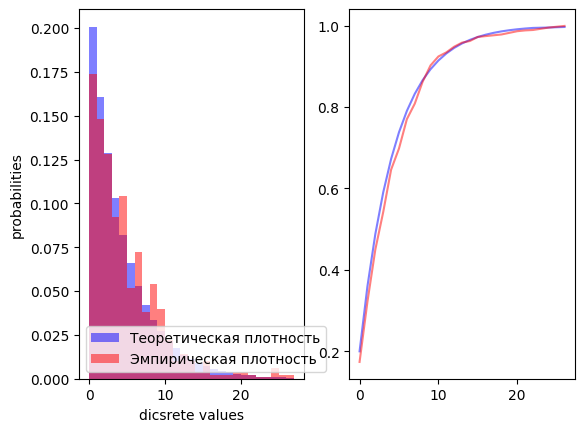

In [11]:

geom  = sps.geom(p=p)


values = lambda m: m, lambda m: (1-p)**m*p, lambda m: (1-p)

args = {
    'dist' : geom,
    'e_m' : (1-p)/p, 
    'e_v' : (1-p)/p**2,
    'n' : n 
}


for D in [D4]:
    print(D.__name__)
    Prin_M_V(*values, D = D, **args)
    Hist_show(*values,D = D, size = 500)


D1
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  3.00|  2.30|  0.70|  2.40|  9.92|  7.52|  4.83| 0.000|
   100|  3.00|  4.09|  1.09|  2.40| 13.84| 11.44| 85.37| 0.001|
  1000|  3.00|  3.69|  0.69|  2.40| 13.18| 10.78|1137.90| 0.004|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|_5.000_|_6.000_|_7.000_|_8.000_|_9.000_|10.000_|11.000_|12.000_|13.000_|14.000_|
|_p_|_0.200_|_0.160_|_0.128_|_0.102_|_0.082_|_0.066_|_0.052_|_0.042_|_0.034_|_0.027_|_0.024_|_0.023_|_0.024_|_0.018_|_0.020_|
|_p*|_0.204_|_0.162_|_0.123_|_0.104_|_0.066_|_0.082_|_0.056_|_0.029_|_0.030_|_0.027_|_0.028_|_0.026_|_0.026_|_0.023_|_0.014_|
|_Δ_|_0.004_|_0.002_|_0.005_|_0.002_|_0.016_|_0.016_|_0.004_|_0.013_|_0.004_|_0.000_|_0.004_|_0.003_|_0.002_|_0.005_|_0.006_|


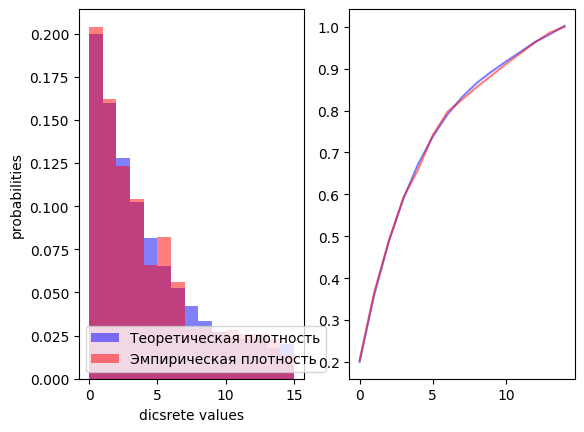

D2
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  3.00|  2.30|  0.70|  2.40|  9.92|  7.52| 11.83| 0.000|
   100|  3.00|  4.09|  1.09|  2.40| 13.84| 11.44|120.11| 0.000|
  1000|  3.00|  3.69|  0.69|  2.40| 13.18| 10.78|3873.42| 0.003|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|_5.000_|_6.000_|_7.000_|_8.000_|_9.000_|10.000_|11.000_|12.000_|13.000_|14.000_|
|_p_|_0.200_|_0.160_|_0.128_|_0.102_|_0.082_|_0.066_|_0.052_|_0.042_|_0.034_|_0.027_|_0.024_|_0.023_|_0.024_|_0.018_|_0.020_|
|_p*|_0.204_|_0.162_|_0.123_|_0.104_|_0.066_|_0.082_|_0.056_|_0.029_|_0.030_|_0.027_|_0.028_|_0.026_|_0.026_|_0.023_|_0.014_|
|_Δ_|_0.004_|_0.002_|_0.005_|_0.002_|_0.016_|_0.016_|_0.004_|_0.013_|_0.004_|_0.000_|_0.004_|_0.003_|_0.002_|_0.005_|_0.006_|


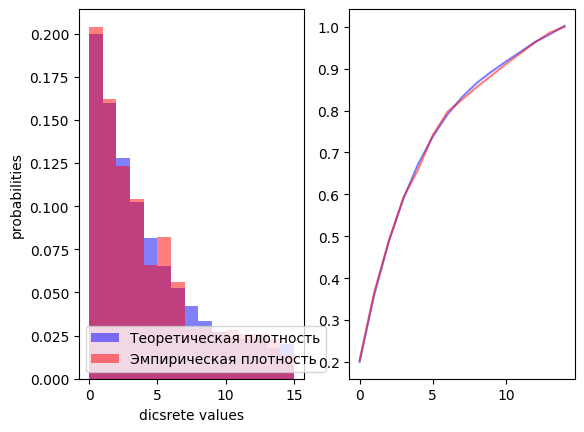

D6
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  3.00|  2.30|  0.70|  2.40|  9.92|  7.52| 15.42| 0.000|
   100|  3.00|  4.09|  1.09|  2.40| 13.84| 11.44|112.19| 0.000|
  1000|  3.00|  3.69|  0.69|  2.40| 13.18| 10.78|1240.35| 0.003|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|_5.000_|_6.000_|_7.000_|_8.000_|_9.000_|10.000_|11.000_|12.000_|13.000_|14.000_|
|_p_|_0.200_|_0.160_|_0.128_|_0.102_|_0.082_|_0.066_|_0.052_|_0.042_|_0.034_|_0.027_|_0.024_|_0.023_|_0.024_|_0.018_|_0.020_|
|_p*|_0.204_|_0.162_|_0.123_|_0.104_|_0.066_|_0.082_|_0.056_|_0.029_|_0.030_|_0.027_|_0.028_|_0.026_|_0.026_|_0.023_|_0.014_|
|_Δ_|_0.004_|_0.002_|_0.005_|_0.002_|_0.016_|_0.016_|_0.004_|_0.013_|_0.004_|_0.000_|_0.004_|_0.003_|_0.002_|_0.005_|_0.006_|


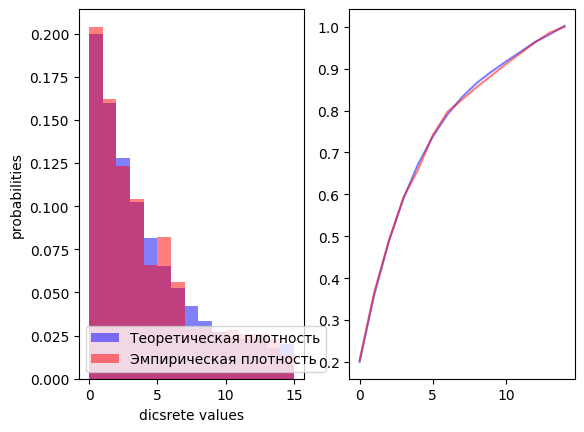

D7
     N|     E|    E*|     Δ|     D|    D*|     Δ|chi2(p)|  time|
    10|  3.00|  2.30|  0.70|  2.40|  9.92|  7.52| 11.08| 0.000|
   100|  3.00|  4.09|  1.09|  2.40| 13.84| 11.44|181.22| 0.000|
  1000|  3.00|  3.69|  0.69|  2.40| 13.18| 10.78|1420.87| 0.003|
|_x_|_0.000_|_1.000_|_2.000_|_3.000_|_4.000_|_5.000_|_6.000_|_7.000_|_8.000_|_9.000_|10.000_|11.000_|12.000_|13.000_|14.000_|
|_p_|_0.200_|_0.160_|_0.128_|_0.102_|_0.082_|_0.066_|_0.052_|_0.042_|_0.034_|_0.027_|_0.024_|_0.023_|_0.024_|_0.018_|_0.020_|
|_p*|_0.204_|_0.162_|_0.123_|_0.104_|_0.066_|_0.082_|_0.056_|_0.029_|_0.030_|_0.027_|_0.028_|_0.026_|_0.026_|_0.023_|_0.014_|
|_Δ_|_0.004_|_0.002_|_0.005_|_0.002_|_0.016_|_0.016_|_0.004_|_0.013_|_0.004_|_0.000_|_0.004_|_0.003_|_0.002_|_0.005_|_0.006_|


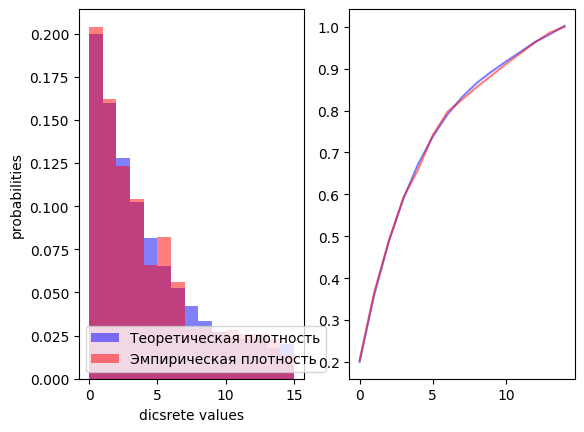

In [12]:


values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0.2,
 0.16000000000000003,
 0.12800000000000003,
 0.10240000000000003,
 0.08192000000000002,
 0.06553600000000002,
 0.052428800000000025,
 0.041943040000000015,
 0.033554432000000016,
 0.026843545600000015,
 0.024474836480000013,
 0.02317986918400001,
 0.023743895347200009,
 0.017995116277760009,
 0.02]

args = {
    'dist' : geom,
    'e_m' : n*p, 
    'e_v' : n*p*(1-p),
    'n' : n 
}



for D in [D1,D2,D6,D7]:
    print(D.__name__)
    Prin_M_V(*values, D = D, **args)
    Hist_show(*values,D = D, size = 1000)
